In [40]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
df = pd.read_csv('mlp.csv')

## Selecting the input features and the target variable

In [28]:
X = df.drop(['Time Stamp','Catalyst Type','Yield'],axis=1)
y = df['Yield']

## Spliting the data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the features using StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining the SVR model

In [31]:
svr = SVR()

## Defining the hyperparameters for tuning

In [32]:
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

## Performing hyperparameter tuning using GridSearchCV

In [33]:
grid_search = GridSearchCV(svr, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

## Getting the best hyperparameters and the corresponding model

In [34]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

## Predicting on the test set using the best model

In [38]:
y_pred = best_model.predict(X_test_scaled)

## Evaluating the model

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print("Best Hyperparameters:", best_params)

Mean Squared Error: 0.5587618047712176
R2 Score: 0.039359635725428
Best Hyperparameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}


## Visualization

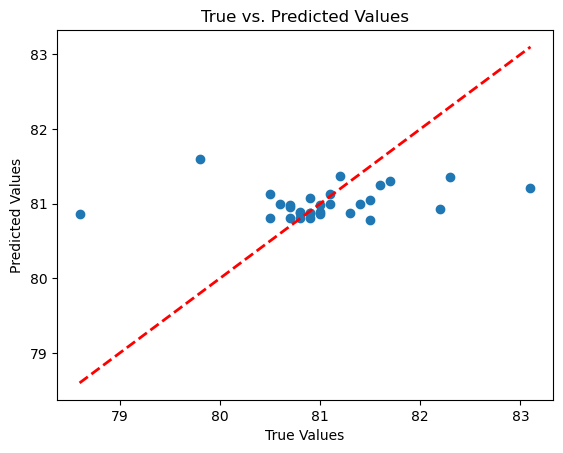

In [41]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residual Plot

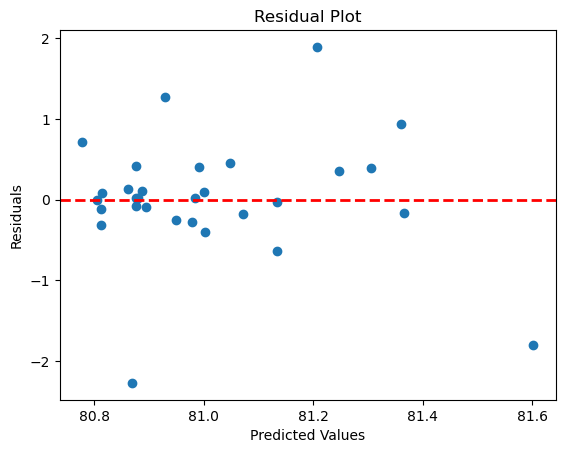

In [42]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()